In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts

In [3]:
data_fr = pd.DataFrame({
    'Type1': np.random.randn(20),
    'Type2':np.random.standard_normal(size = 20),
    'Type3':np.random.normal(loc = 10, scale = 3, size = 20),
    'Type4':np.random.poisson(lam = 5, size = 20),
    'Type5':np.random.uniform(size = 20),
    'Type6':np.random.exponential(scale = 1, size = 20)    
})

data_fr

,Type1,Type2,Type3,Type4,Type5,Type6
0,0.289169,-1.172709,7.619293,2,0.905453,0.763143
1,1.115295,-0.232687,12.390121,10,0.560575,0.786765
2,0.792677,-0.335770,6.898454,6,0.886184,2.958637
3,0.358139,-1.369642,10.740551,2,0.961712,0.495545
4,-0.122626,0.872843,12.497045,5,0.022859,1.431015
5,0.626514,-0.515967,11.313357,3,0.763054,0.103606
6,-0.454199,0.461745,6.579598,5,0.179186,0.570292
7,-0.559499,0.329016,10.185307,5,0.789434,0.263794
8,-0.626347,-0.456653,5.994697,7,0.459432,0.897962
9,0.011886,-0.461389,14.132579,6,0.186081,2.505720


In [5]:
data_fr = pd.DataFrame({key: sorted(values) for key, values in data_fr.transpose().iterrows()})

In [6]:
def data_mean(arr,n):
    all_data = 0
    for i in range(n):
        all_data += arr[i]
    return all_data/n
data_mean_value = {i: data_mean(data_fr[i], 20) for i in data_fr}


In [7]:
def data_squared(arr,n, dat_mean):
    s = 0
    for i in range(n):
        s += ((arr[i]-dat_mean)**2)
    return s
data_squared_value = {i: data_squared(data_fr[i], 20, data_mean_value[i]) for i in data_fr}

In [11]:
a = [0.4734, 0.3211, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140]

def b(arr, n):
    B = 0
    for i in range(n//2):
        B += (a[i]*(arr[(n-1)-i] - arr[i]))
    return B

b_value = {i: b(data_fr[i], 20) for i in data_fr}

In [13]:
def W (squared, b):
    return (b**2)/squared

W_value = {i: W(b_value[i],data_squared_value[i]) for i in data_fr}

WTheory = sts.shapiro(data_fr['Type1'])
W_value, WTheory

({'Type1': 48.196901584368426,
  'Type2': 54.267078795473566,
  'Type3': 2793.862563360651,
  'Type4': 1101.3635172851575,
  'Type5': 1.791224288837966,
  'Type6': 49.41089420532306},
 (0.9696311354637146, 0.747063934803009))

In [14]:
column_name = ["Variable", "Statistics", "Distribution"]
table = pd.DataFrame(columns = column_name)
table

,Variable,Statistics,Distribution


In [15]:
table["Variable"] = data_fr.keys()
table

,Variable,Statistics,Distribution
0,Type1,NaN,NaN
1,Type2,NaN,NaN
2,Type3,NaN,NaN
3,Type4,NaN,NaN
4,Type5,NaN,NaN
5,Type6,NaN,NaN


In [16]:
table["Distribution"] = [('normal' if 'Norm' in i else 'non-normal') for i in table["Variable"]]
table

,Variable,Statistics,Distribution
0,Type1,NaN,non-normal
1,Type2,NaN,non-normal
2,Type3,NaN,non-normal
3,Type4,NaN,non-normal
4,Type5,NaN,non-normal
5,Type6,NaN,non-normal


In [17]:
for i in range(table.shape[0]):
    if 'Norm' in table["Variable"][i]:
        table['Statistics'][i] = f'{data_fr[table["Variable"][i]].mean()} {[data_fr[table["Variable"][i]].std()]}'
table

,Variable,Statistics,Distribution
0,Type1,NaN,non-normal
1,Type2,NaN,non-normal
2,Type3,NaN,non-normal
3,Type4,NaN,non-normal
4,Type5,NaN,non-normal
5,Type6,NaN,non-normal


In [18]:
for i in range(table.shape[0]):
    if 'Norm' not in table["Variable"][i]:
        table["Statistics"][i] = f'{data_fr[table["Variable"][i]].median()} [{data_fr[table["Variable"][i]].quantile(0.25)}; {data_fr[table["Variable"][i]].quantile(0.75)}]'
table

,Variable,Statistics,Distribution
0,Type1,0.2334783060934 [-0.2055306346505857; 0.658853...,non-normal
1,Type2,-0.22012055529278496 [-0.580217365314114; 0.41...,non-normal
2,Type3,10.981355333178108 [7.513675038584704; 12.6559...,non-normal
3,Type4,5.0 [4.75; 7.0],non-normal
4,Type5,0.47272757629596573 [0.3734735438017699; 0.800...,non-normal
5,Type6,0.532918565103545 [0.25680335761970313; 1.0086...,non-normal


The PDF backend does not currently support the selected font.


RuntimeError: Failed to open TrueType font

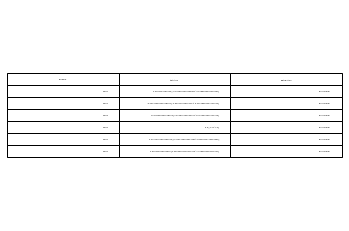

In [23]:
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt
fig = plt.figure()
ax=fig.add_subplot(111)

cell_text = []
for row in range(len(table)):
    cell_text.append(table.iloc[row])

ax.table(cellText=cell_text, colLabels=table.columns, loc='center')
ax.axis('off')

pdf = matplotlib.backends.backend_pdf.PdfPages("saving.pdf")
pdf.savefig(fig)
pdf.close()